In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("curriculum-access.txt", sep=" ", names=["date", "time", "request_method", "idk1", "idk2", "ip"])
df

,date,time,request_method,idk1,idk2,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...,...,...
543591,2020-05-15,15:01:40,java-ii/file-io,602,56.0,48.188.241.68
543592,2020-05-15,15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
543593,2020-05-15,15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17
543594,2020-05-15,15:05:14,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [3]:
df["datetime"] = df.date + " " + df.time
df.drop(columns=["date", "time"], inplace=True)
df = df.set_index("datetime")
df

,request_method,idk1,idk2,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17


In [4]:
df.idk1.value_counts()

11     11065
64     10784
53      9534
1       5437
344     5370
       ...  
593        1
592        1
649        1
66         1
163        1
Name: idk1, Length: 650, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543596 entries, 2018-01-26 09:55:03 to 2020-05-15 15:06:05
Data columns (total 4 columns):
request_method    543595 non-null object
idk1              543596 non-null int64
idk2              515740 non-null float64
ip                543596 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 20.7+ MB


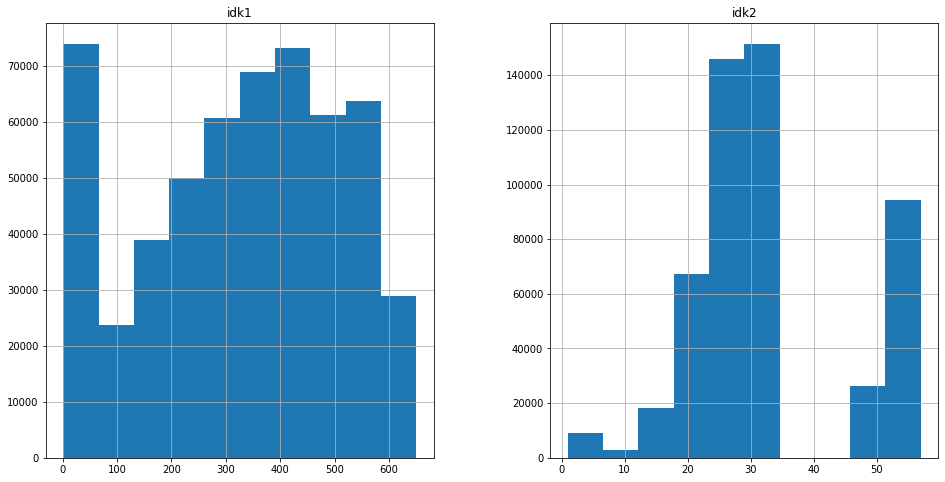

In [6]:
df.hist(figsize=(16, 8))
plt.show()

In [7]:
df.idk2.value_counts().sort_index()

1.0      8882
2.0        93
4.0         4
5.0         1
6.0        72
7.0       495
8.0      1712
9.0         5
11.0      204
12.0      270
13.0     2626
14.0     9374
15.0      691
16.0      743
17.0     4821
18.0     1641
19.0     1165
21.0     7411
22.0    28997
23.0    28193
24.0    35336
25.0    25364
26.0    27586
27.0    20264
28.0    37409
29.0    36613
31.0    24322
32.0    27920
33.0    38851
34.0    23845
51.0    26389
52.0    26212
53.0    29992
55.0    14252
56.0    14438
57.0     9547
Name: idk2, dtype: int64

In [8]:
df.ip.value_counts()

98.106.20.59       284579
98.106.20.62        61662
193.172.118.211      9029
13.107.209.195       4219
173.125.68.94        2980
                    ...  
108.78.198.79           1
174.128.108.20          1
73.182.157.186          1
67.103.7.170            1
25.28.57.44             1
Name: ip, Length: 3495, dtype: int64

In [9]:
df.describe()

,idk1,idk2
count,543596.000000,515740.000000
mean,329.354445,32.625877
std,178.595632,12.699356
min,1.000000,1.000000
25%,195.000000,24.000000
50%,344.000000,29.000000
75%,476.000000,34.000000
max,650.000000,57.000000


In [10]:
df.groupby(["idk1", "idk2"]).ip.count()

idk1  idk2
1     8.0     1617
      28.0    3820
2     22.0    1541
3     22.0    1562
4     22.0     692
              ... 
646   8.0       41
647   14.0      10
648   56.0     488
649   5.0        1
650   34.0       2
Name: ip, Length: 628, dtype: int64

In [11]:
# X = df.index
# y = df.idk1
# plt.plot(X, y)

In [12]:
# X = df.index
# y = df.idk2
# plt.plot(X, y)

In [13]:
df[df.idk1.isna() == True]

,request_method,idk1,idk2,ip
datetime,,,,


In [14]:
df[df.idk2.isna() == True]

,request_method,idk1,idk2,ip
datetime,,,,
2018-01-26 16:46:16,/,48,NaN,98.106.20.62
2018-01-26 16:46:24,spring/extra-features/form-validation,48,NaN,98.106.20.62
2018-01-26 17:54:24,/,48,NaN,98.106.20.62
2018-01-26 18:32:03,/,48,NaN,98.106.20.62
2018-01-26 18:32:17,mysql/relationships/joins,48,NaN,98.106.20.62
...,...,...,...,...
2020-05-13 16:30:22,8-clustering/project,349,NaN,157.81.5.3
2020-05-13 16:30:38,8-clustering/5-model,349,NaN,157.81.5.3
2020-05-13 17:36:13,/,366,NaN,100.89.63.138


In [15]:
idk2 = pd.DataFrame(df.groupby(["idk2", "idk1"]).ip.count()).head(50)
idk2

ip
idk2 idk1      
1.0  11    2735
     60     517
     64    3767
     95       9
     141      9
     146     63
     148     80
     170     43
     209     17
     211   1065
     212      1
     248     48
     257     34
     312    116
     313    270
     316     14
     398     77
     402     17
2.0  144     14
     280     68
     396     11
4.0  85       4
5.0  649      1
6.0  283     59
     405     13
7.0  77      10
     88     345
     169      5
     173     97
     348      3
     513     35
8.0  1     1617
     114     18
     150     23
     174     13
     646     41
9.0  152      5
11.0 88       6
     177      3
     245    155
     279     10
     463     30
12.0 88      10
     101    224
     161     11
     214     25
13.0 50     280
     51     388
     66       1
     68    1351

In [16]:
df[df.idk2 == 28]

,request_method,idk1,idk2,ip
datetime,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,98.106.20.59
2018-12-06 14:25:40,javascript-i,314,28.0,98.106.20.59
2018-12-06 14:25:41,javascript-i/coffee-project,314,28.0,98.106.20.59
2018-12-06 15:31:29,spring,40,28.0,171.249.174.248
2018-12-06 15:31:33,spring/fundamentals/security,40,28.0,171.249.174.248
...,...,...,...,...
2020-05-15 14:52:04,10-anomaly-detection/4-detecting-timeseries-an...,11,28.0,77.186.132.227
2020-05-15 14:52:05,10-anomaly-detection/4-detecting-timeseries-an...,1,28.0,71.122.216.54
2020-05-15 14:52:13,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [17]:
df[df.request_method.isna() == True]

,request_method,idk1,idk2,ip
datetime,,,,
2020-04-08 09:25:18,NaN,586,55.0,73.178.241.52


In [18]:
df[df.idk1 == 586]

,request_method,idk1,idk2,ip
datetime,,,,
2020-02-03 15:42:12,/,586,55.0,98.106.20.59
2020-02-04 04:37:19,/,586,55.0,68.11.176.201
2020-02-04 04:59:08,appendix/vocabulary,586,55.0,68.11.176.201
2020-02-04 05:01:03,6-regression/1-overview,586,55.0,68.11.176.201
2020-02-04 05:01:41,/,586,55.0,68.11.176.201
...,...,...,...,...
2020-05-15 13:56:16,9-timeseries/5.2-modeling-lesson2,586,55.0,68.11.170.7
2020-05-15 13:56:24,9-timeseries/4-explore,586,55.0,68.11.170.7
2020-05-15 13:56:40,9-timeseries/3-prep,586,55.0,68.11.170.7


In [19]:
df[df.ip.isna() == True]

,request_method,idk1,idk2,ip
datetime,,,,


In [20]:
df[(df.idk2.isna() == True) | (df.idk1.isna() == True)]

,request_method,idk1,idk2,ip
datetime,,,,
2018-01-26 16:46:16,/,48,NaN,98.106.20.62
2018-01-26 16:46:24,spring/extra-features/form-validation,48,NaN,98.106.20.62
2018-01-26 17:54:24,/,48,NaN,98.106.20.62
2018-01-26 18:32:03,/,48,NaN,98.106.20.62
2018-01-26 18:32:17,mysql/relationships/joins,48,NaN,98.106.20.62
...,...,...,...,...
2020-05-13 16:30:22,8-clustering/project,349,NaN,157.81.5.3
2020-05-13 16:30:38,8-clustering/5-model,349,NaN,157.81.5.3
2020-05-13 17:36:13,/,366,NaN,100.89.63.138


In [21]:
df.groupby("idk1").ip.unique()

idk1
1      [98.106.20.62, 73.178.227.59, 173.57.16.51, 17...
2      [98.106.20.62, 13.248.4.43, 68.12.105.48, 72.4...
3      [98.106.20.62, 73.192.30.131, 73.182.118.227, ...
4      [98.106.20.62, 71.124.232.212, 167.252.113.223...
5      [98.106.20.62, 25.156.252.204, 193.172.118.211...
                             ...                        
646                                    [174.175.198.147]
647        [71.126.212.107, 71.126.214.205, 71.115.4.79]
648                                       [77.188.54.88]
649                                      [71.126.151.42]
650                                      [71.124.226.31]
Name: ip, Length: 650, dtype: object

In [22]:
df.rename(columns={"idk1": "user", "idk2": "cohort"}, inplace=True)

In [23]:
df

,request_method,user,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17


In [24]:
df[df.user.isna() == True]

,request_method,user,cohort,ip
datetime,,,,


In [25]:
len(df[df.cohort.isna() == True].user.unique())

51

In [26]:
df[df.user == 429]

,request_method,user,cohort,ip
datetime,,,,
2019-06-12 12:48:26,/,429,NaN,98.106.20.59
2019-06-12 12:48:29,open_data,429,NaN,98.106.20.59
2019-06-12 12:48:30,Intro_to_Regression_Module,429,NaN,98.106.20.59
2019-06-12 12:48:36,open_data,429,NaN,98.106.20.59
2019-06-14 10:34:43,/,429,NaN,98.106.20.59
...,...,...,...,...
2020-05-09 10:21:39,6-regression/1-overview,429,NaN,69.202.220.224
2020-05-09 10:21:40,3-sql/1-mysql-overview,429,NaN,69.202.220.224
2020-05-09 10:21:42,5-stats/1-overview,429,NaN,69.202.220.224


In [27]:
df[(df.cohort == 55) & (df.user == 586) & (df.request_method.isna() == True)]

,request_method,user,cohort,ip
datetime,,,,
2020-04-08 09:25:18,NaN,586,55.0,73.178.241.52


---
# Questions
1. Can you label students who are viewing both the web dev and data science curriculum?
2. Can you label students by the program they are in?
3. Can you label users by student vs. staff?
4. What are Zach, Maggie, David, and Ryan's ids?
5. Can you label students who are viewing both the web dev and data science curriculum?
6. Can you label students by the program they are in?
7. Can you label users by student vs. staff?

In [28]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False))\
            .reset_index()\
            .rename(index=str, columns={"index": "ip", "ip": "ip_count"})

ip_df

,ip,ip_count
0,98.106.20.59,284579
1,98.106.20.62,61662
2,193.172.118.211,9029
3,13.107.209.195,4219
4,173.125.68.94,2980
...,...,...
3490,108.78.198.79,1
3491,174.128.108.20,1
3492,73.182.157.186,1
3493,67.103.7.170,1


In [29]:
ip_df["ip_prob"] = ip_df["ip_count"] / df.ip.count()

In [30]:
ip_df

,ip,ip_count,ip_prob
0,98.106.20.59,284579,0.523512
1,98.106.20.62,61662,0.113434
2,193.172.118.211,9029,0.016610
3,13.107.209.195,4219,0.007761
4,173.125.68.94,2980,0.005482
...,...,...,...
3490,108.78.198.79,1,0.000002
3491,174.128.108.20,1,0.000002
3492,73.182.157.186,1,0.000002
3493,67.103.7.170,1,0.000002


In [31]:
ip_df[ip_df.ip_prob < .01]

,ip,ip_count,ip_prob
3,13.107.209.195,4219,0.007761
4,173.125.68.94,2980,0.005482
5,77.186.132.227,1826,0.003359
6,137.51.33.152,1788,0.003289
7,68.12.137.147,1614,0.002969
...,...,...,...
3490,108.78.198.79,1,0.000002
3491,174.128.108.20,1,0.000002
3492,73.182.157.186,1,0.000002
3493,67.103.7.170,1,0.000002


In [32]:
# ryan's function
def get_topic(destination):
    ds_list = ["python", "time series", "nlp"]
    web_dev = ["javascript", "java", "css"]
    for ds in ds_list:
        if ds in destination:
            return "Data Science"
    for wd in web_dev:
        if wd in destination:
            return "Web Dev"
    return "Unknown"
# df["course"] = df.destination.apply(get_topic)